In [1]:
# In case your notebook server doesn't run in your home folder.
import os
os.chdir("/home/petrbel/ubuntu-ranking-dataset-creator/statistics")

Author: Petr Belohlavek

Copyright: IBM 2016

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy
from scipy.stats import chisquare, ttest_ind
from utils import *

In [3]:
# replace with appropriate paths
train_n_uterrances = n_utterances_counts('/home/petrbel/ubuntu-ranking-dataset-creator/src/train_stem.csv', '__eou__')
test_n_uterrances = n_utterances_counts('/home/petrbel/ubuntu-ranking-dataset-creator/src/test_stem.csv', '__eou__')
valid_n_uterrances = n_utterances_counts('/home/petrbel/ubuntu-ranking-dataset-creator/src/valid_stem.csv', '__eou__')

Compute max. number of utterances within a single context.

In [4]:
max_utt = max(max(train_n_uterrances), max(test_n_uterrances), max(valid_n_uterrances)) + 1
max_utt

161

Compute the *training* counts of the utterance numbers and their distribution

In [5]:
train_counts, train_distr = distribution(train_n_uterrances, max_utt=max_utt)
real_test_counts, test_distr = distribution(test_n_uterrances, max_utt=max_utt)
real_valid_counts, valid_distr = distribution(valid_n_uterrances, max_utt=max_utt)

In [6]:
min(train_n_uterrances)

2

In [7]:
max(train_n_uterrances)

160

In [8]:
numpy.mean(train_n_uterrances)

6.1506265156289315

In [9]:
numpy.std(train_n_uterrances)

5.1493647170787691

In [10]:
min(test_n_uterrances)

2

In [11]:
max(test_n_uterrances)

52

In [12]:
numpy.mean(test_n_uterrances)

6.0326109936575056

In [13]:
numpy.std(test_n_uterrances)

5.0080320212686837

In [14]:
min(valid_n_uterrances)

2

In [15]:
max(valid_n_uterrances)

52

In [16]:
numpy.mean(valid_n_uterrances)

5.8633946830265851

In [17]:
numpy.std(valid_n_uterrances)

4.8505738839579084

We test whether the utterance distributions of *test* and *valid* datasets significantly differ from the *train* dataset.

In [18]:
expected_test_counts = train_distr * len(test_n_uterrances)
_, pvalue = chisquare(real_test_counts+1, expected_test_counts+1)
pvalue

1.0

And the same thing for *valid* dataset.

In [19]:
expected_valid_counts = train_distr * len(valid_n_uterrances)
_, pvalue = chisquare(real_valid_counts+1, expected_valid_counts+1)
pvalue

0.9999507065956672

We test whether the means of *test* and *valid* significantly differ from the mean of *train* dataset. Note that with sufficiently large amount of data we can proove any difference possible.

In [20]:
ttest_ind(train_n_uterrances, test_n_uterrances, equal_var=True)    # standard t-test

Ttest_indResult(statistic=3.1214861099718587, pvalue=0.0017994632340653733)

In [21]:
ttest_ind(train_n_uterrances, test_n_uterrances, equal_var=False)   # Welch's test

Ttest_indResult(statistic=3.2058134286377942, pvalue=0.0013489533484183165)

In [22]:
ttest_ind(train_n_uterrances, valid_n_uterrances, equal_var=True)    # standard t-test

Ttest_indResult(statistic=7.7269248544034683, pvalue=1.1028623913778958e-14)

In [23]:
ttest_ind(train_n_uterrances, valid_n_uterrances, equal_var=False)   # Welch's test

Ttest_indResult(statistic=8.1817786628932456, pvalue=2.9581295513079958e-16)

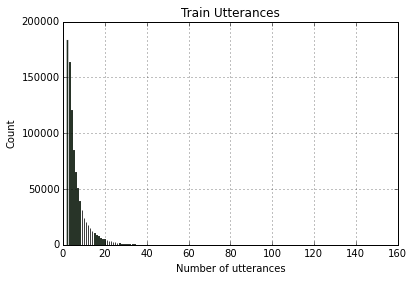

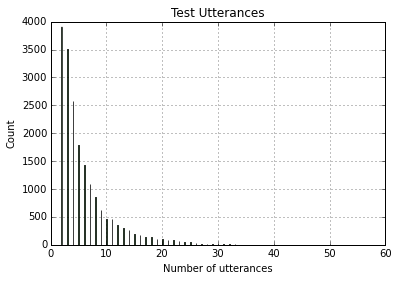

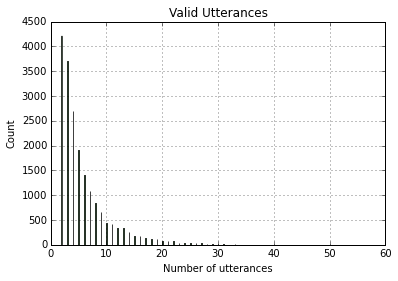

In [24]:
plot_histogram(train_n_uterrances, "Train Utterances", "Number of utterances", "Count")
plot_histogram(test_n_uterrances, "Test Utterances", "Number of utterances", "Count")
plot_histogram(valid_n_uterrances, "Valid Utterances", "Number of utterances", "Count")

In [25]:
train_n_turns = n_utterances_counts('/home/petrbel/ubuntu-ranking-dataset-creator/src/train.csv', '__eot__')
test_n_turns = n_utterances_counts('/home/petrbel/ubuntu-ranking-dataset-creator/src/test.csv', '__eot__')
valid_n_turns = n_utterances_counts('/home/petrbel/ubuntu-ranking-dataset-creator/src/valid.csv', '__eot__')

In [26]:
max_turns = max(max(train_n_turns), max(test_n_turns), max(valid_n_turns)) + 1
max_turns

19

In [27]:
train_counts, train_distr = distribution(train_n_turns, max_utt=max_turns)
real_test_counts, test_distr = distribution(test_n_turns, max_utt=max_turns)
real_valid_counts, valid_distr = distribution(valid_n_turns, max_utt=max_turns)

In [28]:
min(train_n_turns)

2

In [29]:
max(train_n_turns)

18

In [30]:
numpy.mean(train_n_turns)

3.954151

In [31]:
numpy.std(train_n_turns)

2.9767288874197129

In [32]:
min(test_n_turns)

2

In [33]:
max(test_n_turns)

18

In [34]:
numpy.mean(test_n_turns)

3.8457716701902749

In [35]:
numpy.std(test_n_turns)

2.8526346426637113

In [36]:
min(valid_n_turns)

2

In [37]:
max(valid_n_turns)

18

In [38]:
numpy.mean(valid_n_turns)

3.7924846625766873

In [39]:
numpy.std(valid_n_turns)

2.7922685330396164

In [40]:
expected_test_counts = train_distr * len(test_n_turns)
_, pvalue = chisquare(real_test_counts+1, expected_test_counts+1)
pvalue

0.003483564483629084

In [41]:
expected_valid_counts = train_distr * len(valid_n_turns)
_, pvalue = chisquare(real_valid_counts+1, expected_valid_counts+1)
pvalue

2.3723808813689662e-07

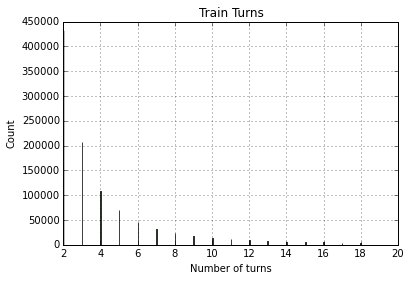

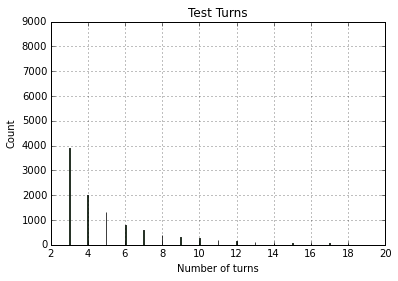

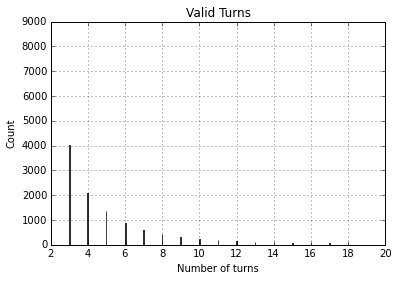

In [42]:
plot_histogram(train_n_turns, "Train Turns", "Number of turns", "Count")
plot_histogram(test_n_turns, "Test Turns", "Number of turns", "Count")
plot_histogram(valid_n_turns, "Valid Turns", "Number of turns", "Count")

In [43]:
pos_utterances, pos_turns, pos_words, neg_utterances, neg_turns, neg_words = train_stats("/home/petrbel/ubuntu-ranking-dataset-creator/src/train_stem.csv")

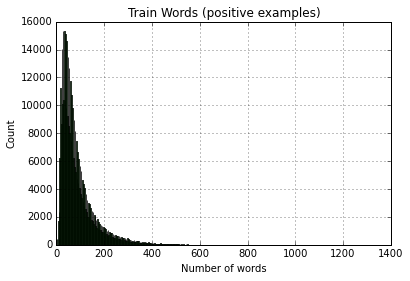

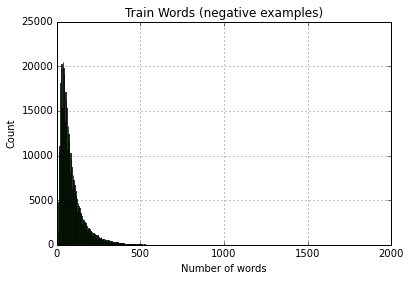

In [44]:
plot_histogram(pos_words, "Train Words (positive examples)", "Number of words", "Count")
plot_histogram(neg_words, "Train Words (negative examples)", "Number of words", "Count")

Utterances

In [45]:
ttest_ind(pos_utterances, neg_utterances)

Ttest_indResult(statistic=-0.72871878180491056, pvalue=0.46617389154144917)

Turns

In [46]:
ttest_ind(pos_turns, neg_turns)

Ttest_indResult(statistic=-0.61394593748394155, pvalue=0.53925120833330875)

Words

In [47]:
ttest_ind(pos_words, neg_words)

Ttest_indResult(statistic=-0.5451388688023554, pvalue=0.58565814708797381)